# Feature Enginnering


A feature is an information about what we are studying. For example, the age or the gender of a person when predicting what they will buy.

In the dataframe, each feature will be a column, and each example will only be characterized by its features. Features are everything you have to do the prediction.

Feature engineering is about finding, creating and choosing the significant features that allow us to do the prediction.


Imports

In [1]:
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
from generate_dataset import generate_dataset
from sklearn import datasets
from sklearn.preprocessing import LabelEncoder


## Correlation with the target

We are looking for features that are correlated to the target we're predicting.

Therefore, one approach is to mesure this correlation.

The correlation is a float in [-1,1]. When is is closer to 0, the variables are decorrelated. When closer to 1 or -1, the variables are correlated.

In what follows, find the features with a correlation lower than 0.2

In [2]:
n_features = 20
X, y = generate_dataset(n_features)
threshold = 0.5
# plot the correlation between each feature and y (use np.corrcoef()[0][1]), and returns
# the list of features that have a correlation lower than the threshold
# use plt.bar

#end code

## Correlations in the features

When the features are highly correlated, they provide the same information.

Besides, correlated features can harm the model :

    1- by having one feature many times, we are adding noise to the prediction.
    This is particularly the case for linear models (read about multicolinearity).
    2- by masking other significant correlations between other features.
    3- by increasing the cost of calculation

When we find two features highly correlated, we simply drop one of them

In [3]:
# Find the features in X that have a correlation higher than 0.9
threshold = 0.9
# Code

# End code

### Using PCA
PCA is a different approach to do feature selection.

PCA is a dimensionality reduction algorithm that finds the 2D or 3D space where the data is
as dispersed as possible.

The axis of this space will be our features.

It can also be used simply to have a 2D or 3D visualization of the data.

PCA is particularly used with high dimensional datasets.

NB: It is a necessary condition to normalize the data prior to using PCA

In [4]:
def PCA_(data, Y, target_index, give_return=False):
    from sklearn.decomposition import PCA
    #Verified.GenerateCOLORS
    '''
    Inputs:
        data: 2D np array
        Y: 2D np array
        target_index: int, index of the column in Y
    Outputs:
        None, only a plot.
    Description:
    Apply pca with coloring the data according to the label chosen by target_index
    '''
    y = Y[:,target_index]
    pca = PCA(n_components=2)
    X_r = pca.fit(data).transform(data)
    plt.figure(figsize=(12,12))
    colors = ['red', 'blue', 'green']
    for color, label in zip(colors, np.unique(y)):
        plt.scatter(X_r[y == label, 0], X_r[y == label, 1], color=color, alpha=.8, label=label)
    plt.legend(loc='best', shadow=False, scatterpoints=1)
    plt.xlabel('1st eigenvector')
    plt.ylabel('2nd eigenvector')
    plt.title('2D PCA of iris')
    plt.show()
    
    if give_return:
        return X_r
        

In [5]:
iris = datasets.load_iris()
X = iris.data 
y = iris.target.reshape(-1,1)

2D plots of iris

![image.png](./featureengineering_1.png)

Here is the plot we find with PCA

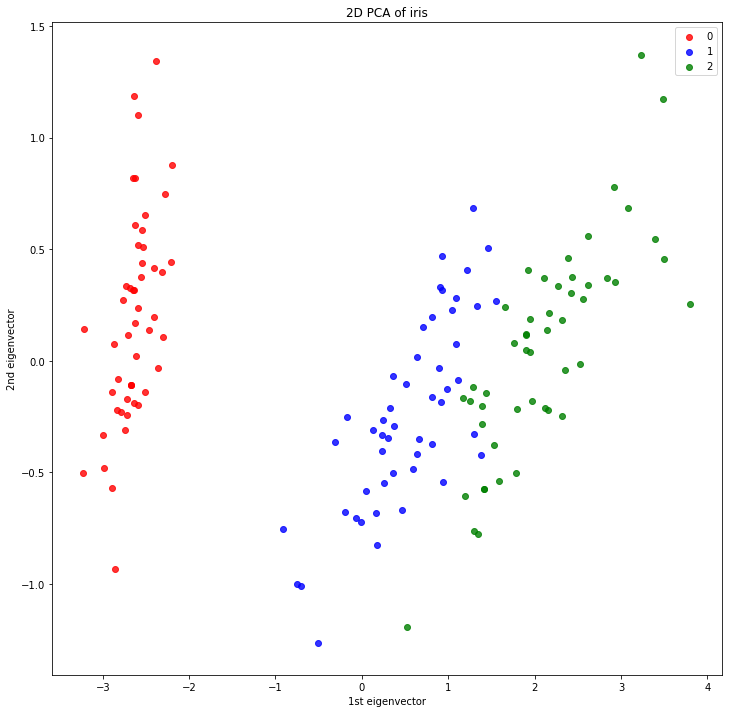

In [6]:
PCA_(X, y, 0)

### Correlations for categorical variables

Can we calculate the correlation when a feature or a target is categorical with float values?

Yes. We ENCODE the categorical feature!

Let's say we are studying a movie database, and we would like include the movie genres in our correlation study.


In [7]:
Genres = ['Comedie', 'Romantic', 'Action', 'Thriller', 'Drama', 'Horror', 'Sci-Fi']

target = []
for i in range(100):
    target.append(Genres[np.random.randint(len(Genres))])
    
print target[:10]

['Drama', 'Action', 'Comedie', 'Romantic', 'Comedie', 'Romantic', 'Drama', 'Romantic', 'Sci-Fi', 'Action']


In [8]:
# Encoding

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(Genres) # we fit to all the instances. In this case, not matter what order
target_encoded = le.transform(target)
print 'Encoded genres:\n', target_encoded

Encoded genres:
[2 0 1 4 1 4 2 4 5 0 4 2 6 1 5 2 0 0 3 2 0 3 5 6 4 5 5 3 0 4 5 6 0 0 3 4 2
 1 2 6 2 0 4 5 1 2 5 1 4 1 5 4 2 6 2 5 5 6 0 6 6 6 4 0 0 0 0 2 3 1 5 4 5 3
 1 4 2 3 6 3 1 5 0 2 6 5 3 6 3 6 6 2 5 6 4 4 6 0 3 3]


When the categorical feature is ordinal, make sure to conserve the order in the encoding

In [9]:
review_type = ['good', 'Not satisfied', 'Very good', 'Not bad', 'Awesome!!']

reviews = []
for i in range(100):
    reviews.append(review_type[np.random.randint(len(review_type))])
print reviews[:10]

['good', 'Not bad', 'Awesome!!', 'Very good', 'Not bad', 'Not satisfied', 'good', 'Not bad', 'Awesome!!', 'Very good']


In [10]:
# Encode here in the right order the previous array.

# End encoding